## Import Library

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Data Preprocessing

In [75]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [76]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


Categorical and numerical values

| Feature Type                      | Columns                                                                        |
| --------------------------------- | ------------------------------------------------------------------------------ |
| **Categorical (Nominal)**         | Area Category, Nama Daerah, Terjual/Belum, Arah Hadap Rumah, Posisi Rumah, ROW |
| **Numeric (Continuous/Discrete)** | Luas Tanah, Luas Bangunan, Kamar, Kamar Mandi, Lantai, Harga                   |


1.   List item
2.   List item



In [77]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [78]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [79]:
# Remove whitespace in tingkat/lantai column
df = df.rename(columns={"Tingkat/Lantai ": "Tingkat/Lantai", "Spending Score (1-100)": "SpendingScore"})
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [80]:
# Clean whitespace and standardize
# Remove leading/trailing spaces for all string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Standardize capitalization for specific categorical columns
df["Nama Daerah"] = df["Nama Daerah"].str.title()
df["Area Category"] = df["Area Category"].str.title()
df["Arah Hadap Rumah"] = df["Arah Hadap Rumah"].str.title()
df["Posisi Rumah"] = df["Posisi Rumah"].str.title()


/tmp/ipython-input-2226819140.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [81]:
df["Nama Daerah"].unique()

array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
       'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
       'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat Barat', 'Tambak Wedi',
       'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
       'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
       'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
       'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
       'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
       'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
       'Mulyosari Timur', 'Pakuwon City', 'Pakuwon City Florence',
       'Pantai Mentari', 'Royal Residence', 'Villa Kalijudan Indah',
       'Sutorejo Timur', 'Springville Residence', 'Sukomanunggal',
       'Surabaya Pusat', 'Su', 'Mulyosari', 'Krukah Selatan',
       'Mulyosari Utara', 'Pondok Benowo Indah', 'Kenjeran Indah',
       'Tenggilis', 'Wisma Mukti', 'Wonokromo',
       'Sakura Regen

In [82]:
df["Nama Daerah"].value_counts().sort_values()

,count
Nama Daerah,
Lebak Rejo,1
Jelidro Manukan,1
Bulak Cumpat Barat,1
Kalilom,1
Citraland Utara,1
...,...
Wiyung,11
Pakuwon City,17
Mulyorejo,18


In [83]:
df = df[df["Nama Daerah"] != "Su"]
# Because it is incorrect

In [84]:
# Drop terjual/belum because it only has belum
# Drop the column Terjual/Belum
df = df.drop(columns=["Terjual/Belum"])

# Confirm the column is removed
df.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


# EDA

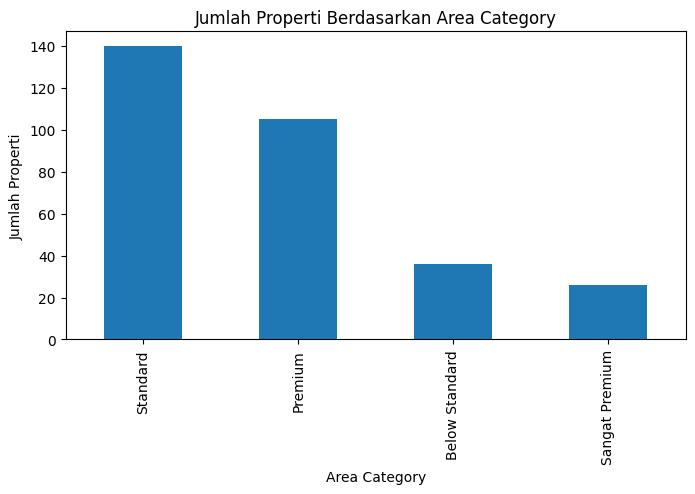

In [85]:
plt.figure(figsize=(8,4))
df["Area Category"].value_counts().plot(kind="bar")
plt.title("Jumlah Properti Berdasarkan Area Category")
plt.xlabel("Area Category")
plt.ylabel("Jumlah Properti")
plt.show()

The bar chart shows that the majority of listed properties fall into the **Standard** category, followed by **Premium**, while **Below Standard** and **Sangat Premium** each represent a much smaller portion of the dataset. This indicates that most properties in the dataset cater to the middle-market segment, with far fewer offerings on the lower or extremely high-end of the market. The distribution suggests that housing availability is concentrated in the Standard and Premium categories, meaning buyers are more likely to encounter properties in these price and quality ranges, while Below Standard and Sangat Premium properties are niche segments with limited supply.


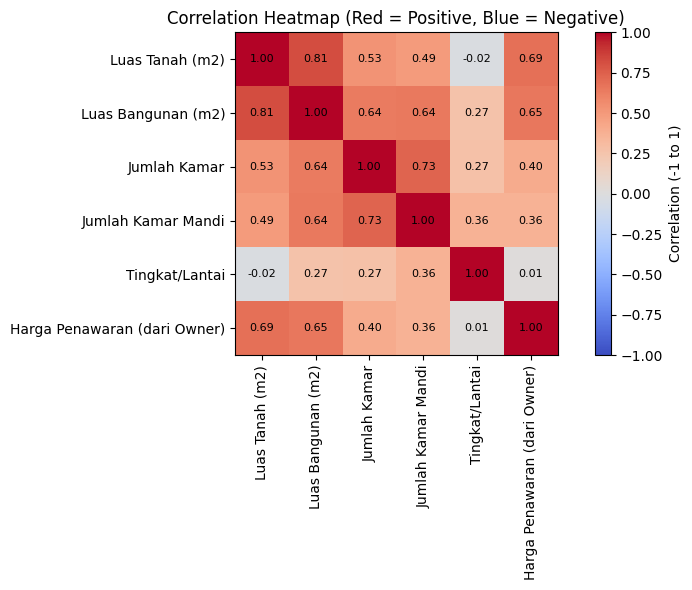

In [86]:
# Select numeric columns
numeric = df.select_dtypes(include=["int64", "float64"])
corr = numeric.corr()

plt.figure(figsize=(9, 6))

# Use red–blue color map (blue = negative, red = positive)
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# Add colorbar with range -1 to 1
cbar = plt.colorbar()
cbar.set_label("Correlation (-1 to 1)")

# Annotate correlation values on heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=8)

# Axes labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap (Red = Positive, Blue = Negative)")
plt.tight_layout()
plt.show()

Based on the correlation heatmap, Harga Penawaran (dari Owner) (property price) shows strong positive correlations with Luas Tanah (0.69) and Luas Bangunan (0.65), indicating that land size and building size are the primary determinants of property pricing. The number of bedrooms (Jumlah Kamar) and bathrooms (Jumlah Kamar Mandi) also have moderate correlations with price, meaning properties with more rooms tend to be priced higher. Meanwhile, the number of floors (Tingkat/Lantai) has almost no correlation with price (0.01), indicating that the floor count is not a major driver of property value compared to size and land area. Overall, the heatmap shows that larger land and building size are the strongest contributors to higher property prices, while room count contributes moderately, and floor count contributes minimally.

## Data Preparation for Clustering

In [87]:
# Duplicate dataset
df_encoded = df.copy()

from sklearn.preprocessing import OrdinalEncoder
import pprint

# ============================================
# 0. DROP HIGH CARDINALITY COLUMN
# ============================================
df_encoded = df_encoded.drop(columns=["Nama Daerah"])

# ============================================
# 1. ORDINAL ENCODING (Area Category)
# ============================================
# Define ranking order for area category
ordinal_map = {
    "Below Standard": 0,
    "Standard": 1,
    "Premium": 2,
    "Sangat Premium": 3
}

df_encoded["Area Category"] = df_encoded["Area Category"].map(ordinal_map)

# ============================================
# 2. NOMINAL ENCODING (OrdinalEncoder)
# ============================================
nominal_cols = ["Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"]

# Initialize ordinal encoder for nominal categories
encoder = OrdinalEncoder()

# Fit + transform nominal columns
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# ============================================
# 3. Build mapping dictionary for documentation
# ============================================
encode_dict = {
    "Area Category": ordinal_map  # include manual mapping first
}

# Add encoded nominal categories
for col, categories in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(categories)}

# ============================================
# Show mapping result
# ============================================
pprint.pprint(encode_dict)

# Show encoded dataset sample
df_encoded.sample(5)


{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Area Category': {'Below Standard': 0,
                   'Premium': 2,
                   'Sangat Premium': 3,
                   'Standard': 1},
 'Lebar Jalan Depan Rumah (ROW)': {'1-2 Mobil': 0,
                                   '< 1 Mobil': 1,
                                   '> 2 Mobil': 2},
 'Posisi Rumah': {'Cul De Sac/Ujung Gang Buntu': 0,
                  'Kantong Belakang/Ngantong': 1,
                  'Standard': 2,
                  'Tikungan/Hook': 3,
                  'Tusuk Sate': 4}}


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
118,1,96,135,3,3,2,2600000000,3.0,2.0,0.0
162,2,200,340,7,2,2,4100000000,1.0,2.0,2.0
54,0,65,50,2,1,1,620000000,3.0,2.0,2.0
291,3,450,650,8,5,2,13900000000,3.0,0.0,2.0
117,1,144,200,4,4,2,2500000000,1.0,2.0,0.0


In [89]:
from sklearn.preprocessing import StandardScaler

# Copy dataset before scaling
df_scaled = df_encoded.copy()

# Select ONLY continuous numerical columns to scale
numerical_cols = ["Luas Tanah (m2)", "Luas Bangunan (m2)",
                  "Jumlah Kamar", "Jumlah Kamar Mandi",
                  "Tingkat/Lantai", "Harga Penawaran (dari Owner)"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit + transform the selected numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Show sample output
df_scaled.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1,0.063554,0.155573,-0.168442,-0.208200,0.314283,-0.183126,3.0,2.0,0.0
1,0,-0.977168,-0.970421,-1.385188,-1.437381,0.314283,-0.569654,3.0,2.0,1.0
2,1,-0.283353,-0.454340,0.439931,0.406390,0.314283,-0.279391,1.0,0.0,0.0
3,3,-0.199105,-0.079009,0.439931,1.020981,0.314283,-0.231258,3.0,2.0,0.0
4,2,0.608694,1.563066,0.439931,1.020981,0.314283,-0.002628,0.0,2.0,0.0


In [90]:
# get stastical information on the new dataset
df_scaled.describe()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
count,307.000000,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,307.000000,307.000000,307.000000
mean,1.394137,-5.207561e-17,-3.182398e-17,1.851577e-16,-1.128305e-16,1.793715e-16,1.301890e-17,2.149837,2.071661,0.791531
std,0.802996,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.011547,0.381018,0.957697
min,0.000000,-1.056461e+00,-1.186237e+00,-1.993561e+00,-1.437381e+00,-1.654798e+00,-5.850326e-01,0.000000,0.000000,0.000000
25%,1.000000,-6.500841e-01,-6.889226e-01,-7.768151e-01,-8.227903e-01,3.142834e-01,-4.358216e-01,1.000000,2.000000,0.000000
50%,1.000000,-3.180442e-01,-3.135912e-01,-1.684420e-01,-2.082000e-01,3.142834e-01,-2.793907e-01,3.000000,2.000000,0.000000
75%,2.000000,2.915217e-01,3.080514e-01,4.399310e-01,4.063903e-01,3.142834e-01,-1.533006e-02,3.000000,2.000000,2.000000
max,3.000000,6.610192e+00,4.378051e+00,5.306915e+00,5.937703e+00,4.252447e+00,1.130853e+01,3.000000,4.000000,2.000000


## Silhouette Score

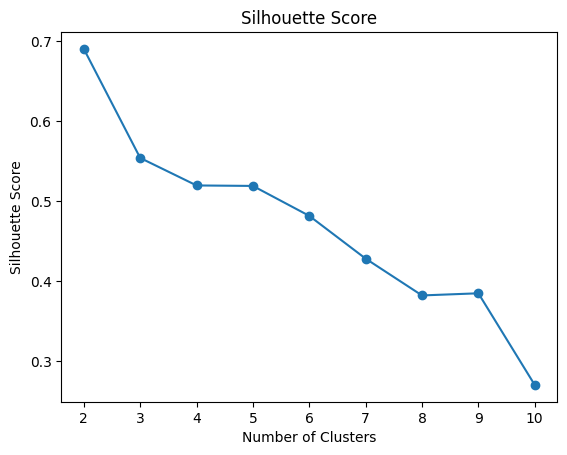

In [91]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


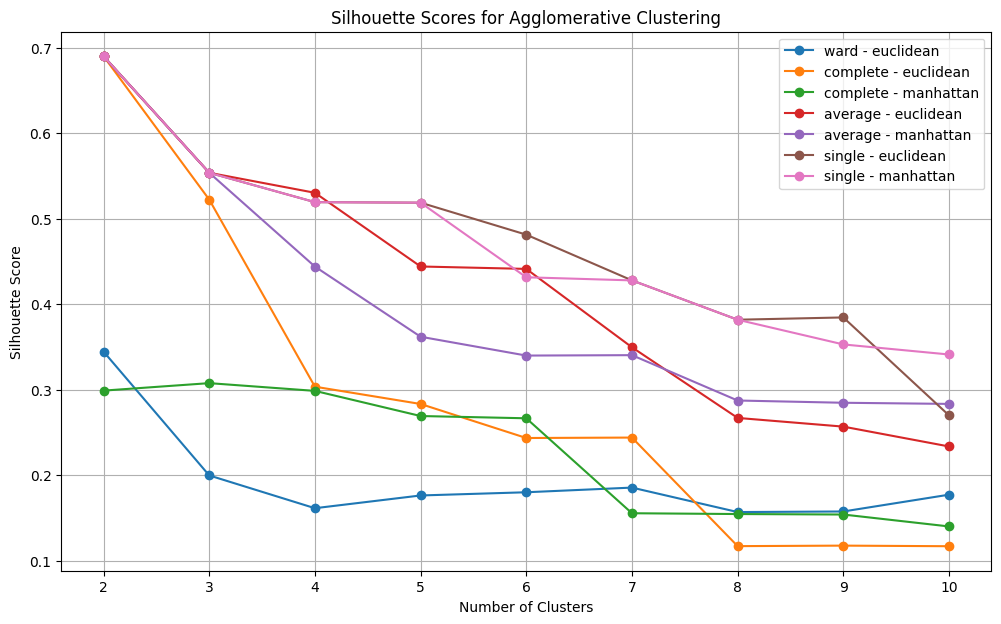


===== BEST MODEL CONFIGURATION =====
Best Silhouette Score: 0.6901945276872359
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [92]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ================================
# SILHOUETTE SCORE COMPARISON
# ================================

# Range of clusters to test
range_n_clusters = range(2, 11)

# Linkage & distance metric combos to compare
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:

        # Ward linkage ONLY supports Euclidean distance
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            clustering = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage=linkage_method,
                metric=metric
            )

            labels = clustering.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, labels)
            current_scores.append(silhouette_avg)

            # Track best configuration
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# ================================
# VISUALIZATION
# ================================
plt.figure(figsize=(12, 7))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering")
plt.legend()
plt.grid(True)
plt.show()

print("\n===== BEST MODEL CONFIGURATION =====")
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


The silhouette score comparison chart evaluates how different combinations of linkage methods (ward, complete, average, single) and distance metrics (euclidean, manhattan) perform when forming clusters ranging from 2 to 10. The silhouette score measures how well data points fit within their assigned cluster relative to other clusters. The higher the score, the better the clustering quality. From the graph, it is clear that the highest silhouette score occurs when using **complete linkage with Euclidean distance** at **2 clusters**, reaching approximately **0.69**, which is a strong indication of well-separated and compact clusters. Other linkage–metric combinations show lower performance, especially as the number of clusters increases, demonstrating that forcing more clusters reduces clustering effectiveness.

As the number of clusters increases beyond 2, all methods show a consistent drop in silhouette scores, indicating that the data does not naturally support many distinct cluster groups. This suggests that the property dataset has a strong natural separation into **two main groups**, which could represent segmentation such as mid-range versus premium properties based on characteristics like land size, building size, and price. Therefore, the optimal clustering configuration, based on silhouette score analysis, is **Agglomerative Clustering with complete linkage and Euclidean metric using 2 clusters**, as this configuration best captures the inherent structure in the dataset.


# Hierarchical Clustering Modeling

In [93]:
# Model 1: Best Combination (From Silhouette Score Result)
agglo_best = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)

# Fit model
y_hc_best = agglo_best.fit_predict(df_scaled)

# Evaluate silhouette score
ss_best = silhouette_score(df_scaled, y_hc_best)
print("Silhouette Score (Best Model):", ss_best)


Silhouette Score (Best Model): 0.6901945276872359


In [94]:
# Model 2: Ward Linkage (must use Euclidean distance)
agglo_ward = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage="ward"
)

# Fit model
y_hc_ward = agglo_ward.fit_predict(df_scaled)

# Evaluate silhouette score
ss_ward = silhouette_score(df_scaled, y_hc_ward)
print("Silhouette Score (Ward Model):", ss_ward)


Silhouette Score (Ward Model): 0.3447151183177967


# DENDOGRAM

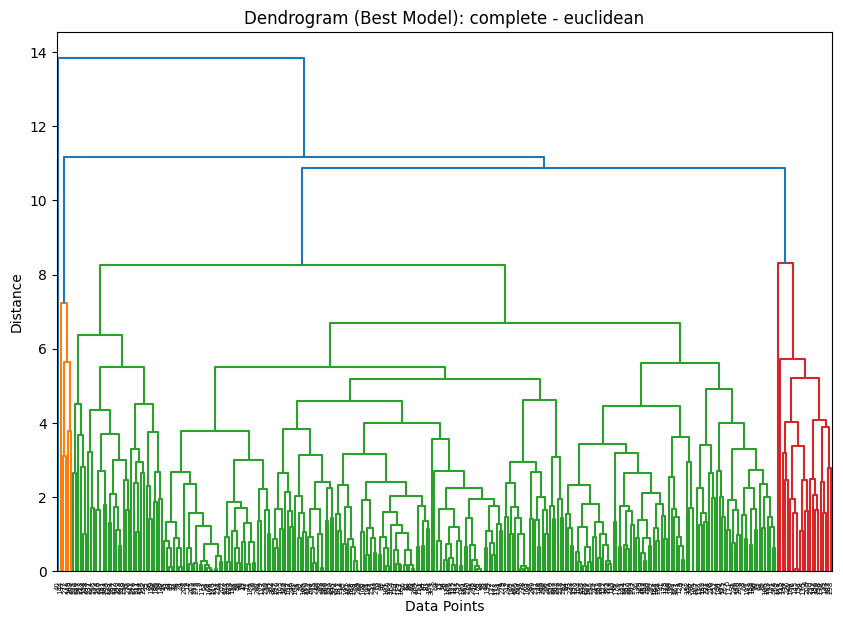

In [96]:
# ============================
# MODEL 1 — Best Parameters
# ============================

# Create linkage matrix (SciPy dendrogram)
linked_best = linkage(df_scaled, method=best_linkage, metric=best_metric)

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_best)
plt.title("Dendrogram (Best Model): " + best_linkage + " - " + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


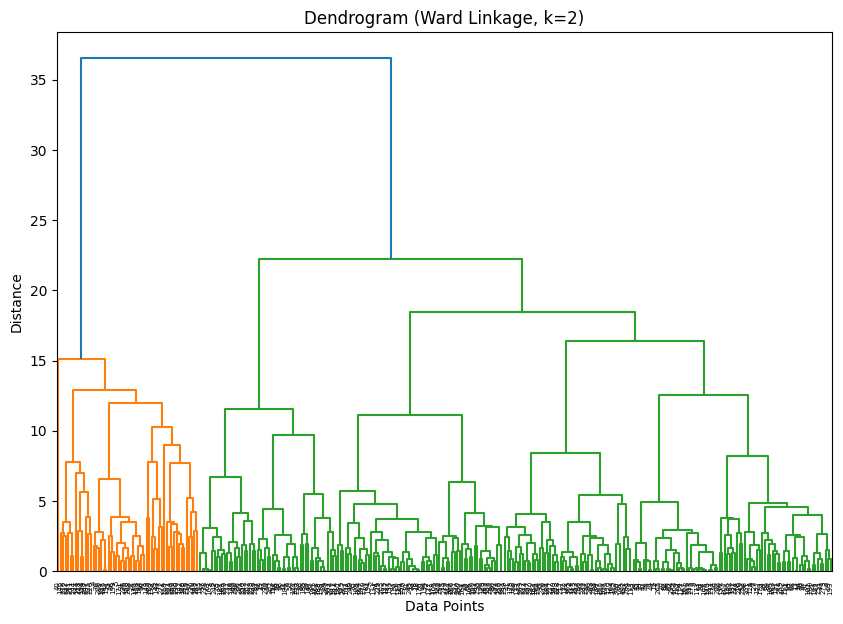

In [97]:
# ============================
# MODEL 2 — Ward Linkage
# ============================

# Ward automatically uses Euclidean distance
linked_ward = linkage(df_scaled, method="ward")

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_ward)
plt.title("Dendrogram (Ward Linkage, k=" + str(best_n_clusters) + ")")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


## Merge with the original data

In [99]:
df['Agglo'] = y_hc_best

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


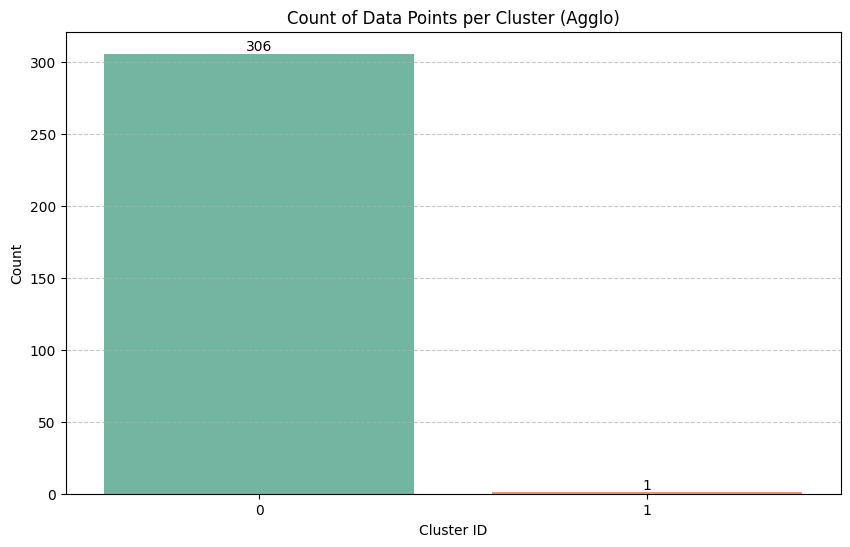

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart shows the number of data points assigned to each cluster by the Agglomerative Clustering model. The result appears highly imbalanced: **Cluster 0 contains 306 properties**, while **Cluster 1 contains only 1 property**. This indicates that the clustering algorithm grouped almost the entire dataset into a single cluster and treated only one data point as a separate cluster, likely due to that point being a significant outlier (e.g., extremely large land area, building size, or high price). Such an imbalance suggests that while the silhouette score may have indicated two clusters as optimal mathematically, in practice the second cluster does not represent a meaningful grouping. It's simply isolating an anomaly. This outcome implies that the dataset naturally forms one dominant group with one extreme property that behaves very differently from the rest.


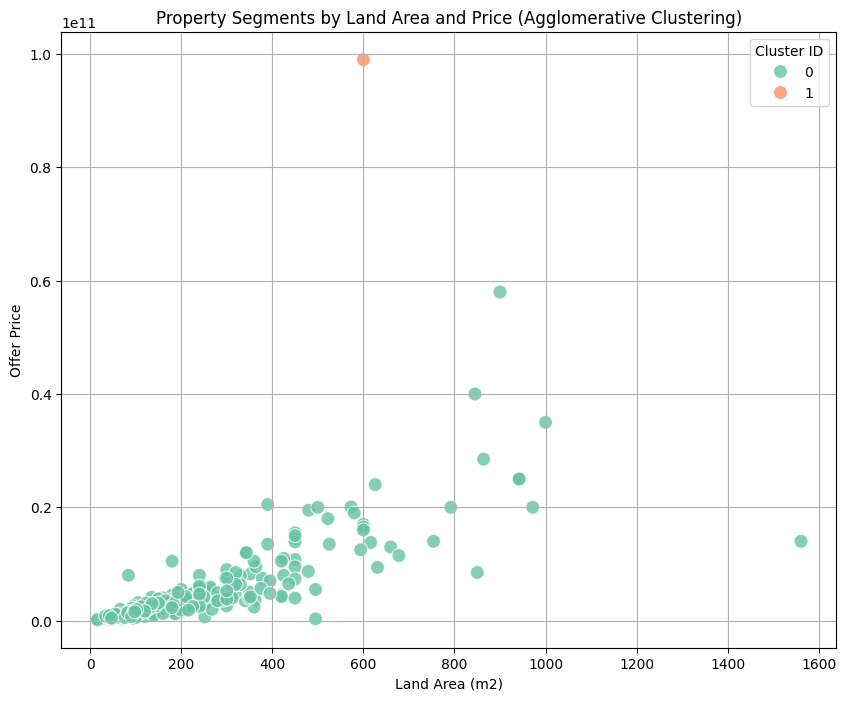

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah (m2)', y='Harga Penawaran (dari Owner)', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Property Segments by Land Area and Price (Agglomerative Clustering)')
plt.xlabel('Land Area (m2)')
plt.ylabel('Offer Price')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

The scatter plot illustrates how properties are segmented using Agglomerative Clustering based on land area and price. Almost all properties form a single cohesive cluster (Cluster 0), showing a consistent trend where larger land areas generally correspond to higher prices. However, one property stands out dramatically as an extreme outlier (Cluster 1), with both an exceptionally large land area and an extremely high price, far above the range of other listings. This separation indicates that the clustering model did not identify two balanced market segments, but rather one dominant group of typical properties and one isolated luxury property that is vastly different from the rest of the dataset.


In [104]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah (m2)'
y_col = 'Harga Penawaran (dari Owner)'
z_col = 'Jumlah Kamar'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Agglo Clusters')

fig.show()

## Comparison & Interpretation

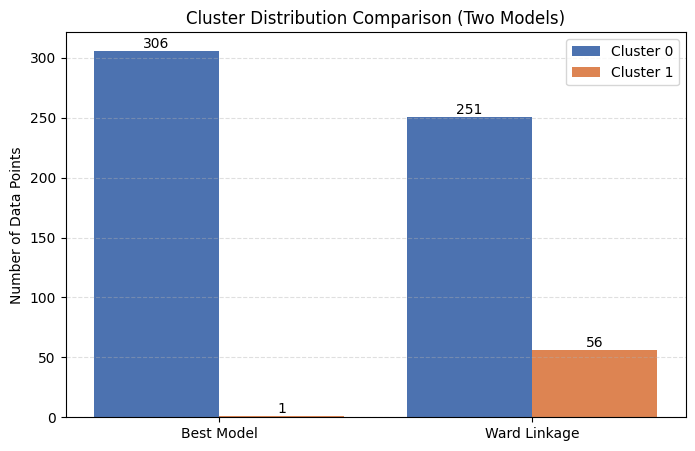

In [114]:


# Total data points per model
best_counts = np.bincount(y_hc_best)     # Model 1 (best linkage + metric)
ward_counts = np.bincount(y_hc_ward)     # Model 2 (Ward linkage)

models = ["Best Model", "Ward Linkage"]
cluster0 = [best_counts[0], ward_counts[0]]
cluster1 = [best_counts[1], ward_counts[1]]

x = np.arange(len(models))
bar_width = 0.4

plt.figure(figsize=(8,5))

# Plot bars
bars1 = plt.bar(x, cluster0, width=bar_width, label="Cluster 0", color="#4C72B0")
bars2 = plt.bar(x + bar_width, cluster1, width=bar_width, label="Cluster 1", color="#DD8452")

# Add quantity labels above each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(x + bar_width/2, models)
plt.ylabel("Number of Data Points")
plt.title("Cluster Distribution Comparison (Two Models)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


The bar chart compares the distribution of properties across clusters for the two hierarchical clustering models. The best model based on the highest silhouette score overwhelmingly assigns 306 properties to Cluster 0 and isolates only one property into Cluster 1, indicating that this model mainly identifies a single extreme outlier rather than forming a meaningful segmentation. In contrast, the Ward linkage model distributes the data more evenly across two clusters, with 251 properties in Cluster 0 and 56 in Cluster 1. This suggests that the Ward model produces a more realistic market segmentation, separating standard or mid-range properties from premium and large-sized properties, instead of focusing solely on outlier detection.


In [111]:
import pandas as pd
from scipy.stats import mode

# Append cluster labels to dataframe (use original encoded numerical data)
df_compare = df_encoded.copy()
df_compare["Cluster_Best"] = y_hc_best
df_compare["Cluster_Ward"] = y_hc_ward

# Mean
mean_best = df_compare.groupby("Cluster_Best").mean()
mean_ward = df_compare.groupby("Cluster_Ward").mean()

# Median
median_best = df_compare.groupby("Cluster_Best").median()
median_ward = df_compare.groupby("Cluster_Ward").median()

print("\n===== MODEL 1 — MEAN VALUES (Best Parameters) =====")
print(mean_best)

print("\n===== MODEL 2 — MEAN VALUES (Ward Linkage) =====")
print(mean_ward)

print("\n===== MODEL 1 — MEDIAN VALUES (Best Parameters) =====")
print(median_best)

print("\n===== MODEL 2 — MEDIAN VALUES (Ward Linkage) =====")
print(median_ward)



===== MODEL 1 — MEAN VALUES (Best Parameters) =====
              Area Category  Luas Tanah (m2)  Luas Bangunan (m2)  \
Cluster_Best                                                       
0                  1.395425       225.957516          265.751634   
1                  1.000000       600.000000          600.000000   

              Jumlah Kamar  Jumlah Kamar Mandi  Tingkat/Lantai  \
Cluster_Best                                                     
0                 4.267974            3.333333        1.843137   
1                 7.000000            5.000000        1.000000   

              Harga Penawaran (dari Owner)  Arah Hadap Rumah  Posisi Rumah  \
Cluster_Best                                                                 
0                             4.714725e+09          2.156863      2.071895   
1                             9.900000e+10          0.000000      2.000000   

              Lebar Jalan Depan Rumah (ROW)  Cluster_Ward  
Cluster_Best                        

Model 1 using complete euclidean linkage results in a highly unbalanced clustering outcome. It places 306 properties into one cluster and only a single property into the second cluster. The statistical summary shows that this lone property has extremely high land area, building area, and price compared to the rest of the dataset. This means that the model is not performing segmentation of the data into meaningful groups. Instead, it is simply isolating one extreme outlier while merging all other properties into a single cluster. As a result, Model 1 does not provide useful segmentation for analysis.

Model 2 using Ward linkage produces a far more meaningful and interpretable segmentation. It divides the data into two clusters with 251 properties in the first cluster and 56 properties in the second. Based on the mean and median values, the second cluster contains properties with larger land and building sizes, more rooms, and significantly higher prices, while the first cluster contains standard to mid range properties. This indicates that Ward linkage successfully identifies distinct market segments within the dataset. Therefore, Ward linkage offers a more valuable and realistic grouping of properties compared to the complete euclidean model.

Cluster 0 (n = 306) — Mainstream Property Market

Profile:
Properties with normal/typical characteristics: medium land size (±162 m² median), 3–4 bedrooms, price around Rp 2.6B (median).

Meaning for the Business:
This represents the core business revenue driver. The majority of properties fall into this segment, meaning buyers are looking for functional, affordable, and strategically located houses. These buyers are price-sensitive and consider financing convenience when making purchasing decisions.

Recommended Strategy:

Focus marketing and sales campaigns on this large segment.

Use pricing incentives: flexible KPR installment programs, discounted fees (free BPHTB, free notary).

Maximize reach via digital real estate platforms and social media ads.

Highlight proximity to schools, commercial centers, and ease of access.

Key KPI: listing turnover speed, number of leads, conversion rate.

Cluster 1 (n = 1) — Ultra-Luxury Outlier Property

Profile:
Property with extreme characteristics: land area 600 m², building 600 m², and listing price Rp 99B.

Meaning for the Business:
This is not a property segment but an outlier or unique asset class. The buyer profile is not mass-market but high-net-worth individuals (HNWI). This unit should not be marketed like standard properties.

Recommended Strategy:

Apply exclusive private selling: appointment only, invitation-based showing.

Use relationship-based marketing, connecting via private networks and premium brokers.

Packaging special services (luxury interior, security, smart home tech)